#Patrick Kellogg

_General Assembly_
_Data Science Course (8/23/15 - 11/12/15)

This python code:

* Recreates the Iris data set we used for K-means clustering
* Adds Voronoi mapping to the clusters


In [323]:
# Imports
%pylab inline
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.datasets.samples_generator import make_blobs
from scipy.spatial import Voronoi, voronoi_plot_2d
from sklearn.cluster import KMeans
import sklearn.datasets as datasets
import random as rnd 

Populating the interactive namespace from numpy and matplotlib


## Iris Dataset

In [324]:
iris = datasets.load_iris()
X = iris['data']
Names = iris['feature_names']
target_names = iris['target_names']
y = iris['target']  

In [325]:
km = KMeans(n_clusters=3, random_state=1)
km.fit(X)
centroids = km.cluster_centers_
yy = km.predict(X)

centroids1 = centroids[0][1], centroids[0][3]
centroids2 = centroids[1][1], centroids[1][3]
centroids3 = centroids[2][1], centroids[2][3]
mycentroids = [centroids1, centroids2, centroids3]
vor = Voronoi(mycentroids)

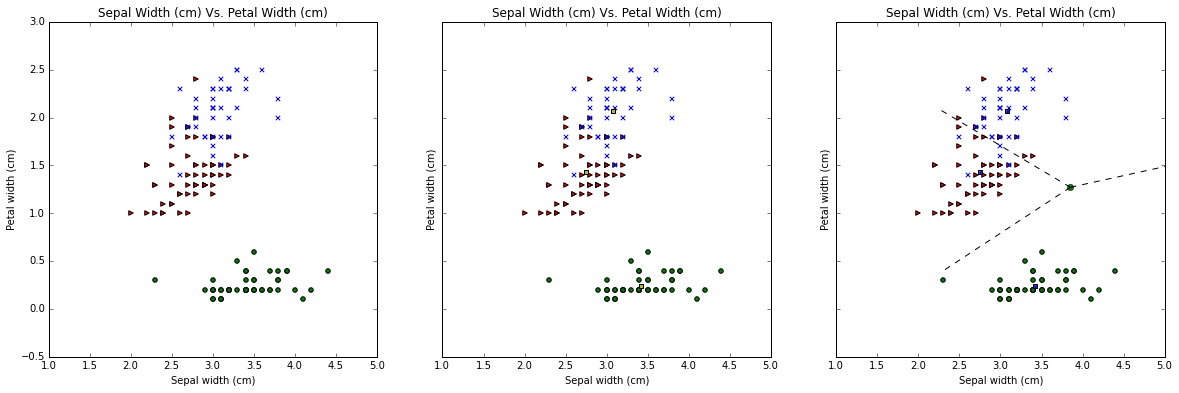

In [326]:
fig, (ax1, ax2, ax3) = plt.subplots( 1,3, figsize=(20,6), sharex=True, sharey=True)

# First the true clusters
for t,marker,c,n in zip(xrange(3),">ox","rgb",target_names):
    ax1.scatter(X[yy == t,1],
               X[yy == t,3],
               marker=marker,
               c=c)

ax1.set_xlabel('Sepal width (cm)')
ax1.set_ylabel('Petal width (cm)')
ax1.set_title('Sepal Width (cm) Vs. Petal Width (cm)')
ax1.legend(loc='best')

# Then the found clusters
for t,marker,c,n in zip(xrange(3),">ox","rgb",unique(km.labels_)):
    ax2.scatter(X[yy == t,1],
               X[yy == t,3],
               marker=marker,
               c=c)

ax2.scatter(centroids[:,1],centroids[:,3],marker = 's',c='y')
    
ax2.set_xlabel('Sepal width (cm)')
ax2.set_ylabel('Petal width (cm)')
ax2.set_title('Sepal Width (cm) Vs. Petal Width (cm)')
ax2.legend(loc='best')

# Then the Voronoi
for t,marker,c,n in zip(xrange(3),">ox","rgb",unique(km.labels_)):
    ax3.scatter(X[yy == t,1],
               X[yy == t,3],
               marker=marker,
               c=c)
    
ax3.scatter(centroids[:,1],centroids[:,3],marker = 's',c='y')

ax3.set_xlabel('Sepal width (cm)')
ax3.set_ylabel('Petal width (cm)')
ax3.set_title('Sepal Width (cm) Vs. Petal Width (cm)')
ax3.legend(loc='best')

voronoi_plot_2d(vor, ax=ax3)

ax1.set_xlim([1, 5])
ax1.set_ylim([-0.5, 3])
ax2.set_xlim([1, 5])
ax2.set_ylim([-0.5, 3])
ax3.set_xlim([1, 5])
ax3.set_ylim([-0.5, 3])

plt.show()

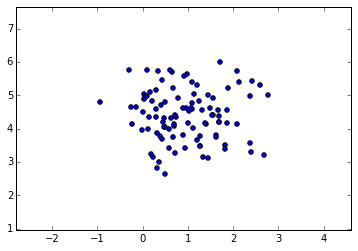

In [327]:
# Create some fake data
rnd.seed()
dsAll, nullit = datasets.make_blobs(centers=1, cluster_std=0.75, random_state=0)
#plt.scatter(dsAll[:,0], dsAll[:,1]);
x = []
y = []
for i in xrange(len(dsAll)):
    x.append(dsAll[i][0])
    y.append(dsAll[i][1])
xmin = min(x)
xmax = max(x)
ymin = min(y)
ymax = max(y)
#print xmin
#print xmax
#print ymin
#print ymax
tempxrange = xmax-xmin
tempyrange = ymax-ymin
xmin = xmin - (tempxrange/2.0)
xmax = xmax + (tempxrange/2.0)
ymin = ymin - (tempyrange/2.0)
ymax = ymax + (tempyrange/2.0)
myxrange = xmax-xmin
myyrange = ymax-ymin
plt.axis([xmin, xmax, ymin, ymax])
plt.scatter(x,y)

In [328]:
# Create a new candidate
def createcandidate():
    # Create 2 random x values and 2 random y values
    rand1 = (rnd.random() * myxrange) + xmin
    rand2 = (rnd.random() * myxrange) + xmin
    rand3 = (rnd.random() * myyrange) + ymin
    rand4 = (rnd.random() * myyrange) + ymin

    # There are six possibilities, a perfectly vertical orientation, a horizontal one,
    # or lines going diagonally through the corners NE, WS, NW, or ES 
    sixrand = int((rnd.random() * 6) + 1)

    #There are two directions
    tworand = int(rnd.random() * 2)
    
    #vertical NS
    if sixrand == 1:
        newline = [rand1, ymax, rand2, ymin, tworand, 0];
    #horizonal WE
    elif sixrand == 2:
        newline = [xmin, rand3, xmax, rand4, tworand, 0];
    #NE
    elif sixrand == 3:
        newline = [rand1, ymax, xmax, rand4, tworand, 0];
    #WS
    elif sixrand == 4:
        newline = [xmin, rand3, rand2, ymin, tworand, 0];
    #NW
    elif sixrand == 5:
        newline = [rand1, ymax, xmin, rand3, tworand, 0];
    #ES
    elif sixrand == 6:
        newline = [xmax, rand4, rand2, ymin, tworand, 0];   
    return newline

In [329]:
# Get 12 new candidates
initpop = []
for i in range(0,12):
    newcand = createcandidate()
    initpop.append(newcand)

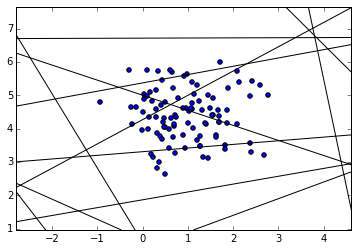

In [330]:
plt.scatter(x,y)
#plt.plot([initpop[0][0],initpop[0][2]],[initpop[0][1],initpop[0][3]],color='k')

for i in range(0,12):
    plt.plot([initpop[i][0],initpop[i][2]],[initpop[i][1],initpop[i][3]],color='k')
plt.axis([xmin, xmax, ymin, ymax])
plt.show()

In [331]:
# Test a point to see if it is included in the space
def isincluded(testx, testy, testline):
    
    # Find the slope and y-intercept
    myslope, myint = convertline(testline)

    # Test the point
    testdir = testline[4]    
    if testline == 0:
        if testy > ((myslope*testx)+myint):
            return 1;
        else:
            return 0;
    else:
        if testy < ((myslope*testx)+myint):
            return 1;
        else:
            return 0;

In [332]:
# Find Specificity
# (1-α), the number of points correctly identified in the population
def findspec(fitcand):

    # Loop through all the data
    numfound = 0
    for i in xrange(len(x)):
        if isincluded(x[i], y[i], fitcand):
           numfound = numfound + 1;
        
    return numfound/float(len(x))

In [333]:
# Find Sensitivity 
# (1-β), in this case the percentage of the graph eliminated
def findsens(fitcand):

    # Set the variables
    mybox = 0
    mytri = 0
    
    #vertical NS
    if ((fitcand[1] == ymax) and (fitcand[3] == ymin)):
        if fitcand[4] == 0:
            if fitcand[0] < fitcand[2]:
                mybox = myyrange * fitcand[0]
                mytri = myyrange * (fitcand[2] - fitcand[0])/2.0;
            else:
                mybox = myyrange * fitcand[2]
                mytri = myyrange * (fitcand[0] - fitcand[2])/2.0;
        else:
            if fitcand[0] < fitcand[2]:
                mybox = myyrange * (xmax - fitcand[2])
                mytri = myyrange * (fitcand[2] - fitcand[0])/2.0;
            else:
                mybox = myyrange * (xmax - fitcand[0])
                mytri = myyrange * (fitcand[0] - fitcand[2])/2.0;
    #horizonal WE
    elif ((fitcand[0] == xmax) and (fitcand[2] == xmin)):
        if fitcand[4] == 0:
            if fitcand[1] < fitcand[3]:
                mybox = myxrange * fitcand[1]
                mytri = myxrange * (fitcand[3] - fitcand[0])/2.0;
            else:
                mybox = myxrange * fitcand[3]
                mytri = myxrange * (fitcand[1] - fitcand[2])/2.0;
        else:
            if fitcand[1] < fitcand[3]:
                mybox = myxrange * (ymax - fitcand[3])
                mytri = myxrange * (fitcand[3] - fitcand[0])/2.0;
            else:
                mybox = myxrange * (ymax - fitcand[0])
                mytri = myxrange * (fitcand[1] - fitcand[3])/2.0;
    #NE
    elif ((fitcand[1] == ymax) and (fitcand[2] == xmin)):
        if fitcand[4] == 0:
            mybox = (myxrange * fitcand[0]) + (fitcand[2] * fitcand[3])
            mytri = ((myxrange - fitcand[0])*(myyrange - fitcand[3]))/2.0;
        else:
            mybox = 0
            mytri = (myyrange - fitcand[3])/2.0;
    #WS
    elif ((fitcand[0] == xmax) and (fitcand[3] == ymin)):
        if fitcand[4] == 0:
            mybox = 0
            mytri = ((fitcand[1])*(fitcand[2]))/2.0;
        else:
            mybox = ((myxrange - fitcand[2]) * myyrange) + ((myyrange - fitcand[1]) * (fitcand[2])) 
            mytri = (fitcand[1] * fitcand[2])/2.0;
    #NW
    elif ((fitcand[1] == ymax) and (fitcand[2] == xmin)):
        if fitcand[4] == 0:
            mybox = (fitcand[0] * ymax) + (fitcand[2] * fitcand[3])
            mytri = ((xmax - fitcand[0])*(ymax-fitcand[3]))/2.0;
        else:
            mybox = 0
            mytri = (ymax-fitcand[3])/2.0;
    #ES
    elif ((fitcand[0] == xmax) and (fitcand[3] == ymin)):
        if fitcand[4] == 0:
            mybox = 0
            #mytri = (((xmax - fitcand[0])*(ymax-fitcand[3]))/2.0;
        else:
            mybox = (xmin * fitcand[0]) + (fitcand[2] * fitcand[3])
            mytri = (ymax-fitcand[3])/2.0;

    return ((mybox * mytri)/(xmax * ymax))

In [334]:
# Fitness function
def fitnessfunction(fitcand):
    
    finalfit = (findspec(fitcand)+ findsens(fitcand))/2
    # In the future, multiply by the size of the tree
    #finalfit = (findspec(fitcand)+ findsens(fitcand))/2 * treesize(pop)
    
    return finalfit   

In [335]:
# Convert back to beta and alpha
def convertline(fitcand):
    
    # Find the slope B
    B = ((fitcand[1]-fitcand[3])/(fitcand[0]-fitcand[2]))
    
    # Find the y-intercept A
    A = (fitcand[1]-(fitcand[0]*B))
    
    return [B,A]

In [336]:
# Do a mutation
def domutation(oldline):

    # Figure out which of the four variables should be mutated
    fourrand = int(rnd.random() * 4)
    oldval = oldline[fourrand]
    tworand = int(rnd.random() * 2)
    onerand = int(rnd.random() * 1)
    if tworand == 0:
        newval = oldval - (oldval * onerand);
    else:
        newval = oldval + (oldval * onerand);
        
    # Copy the line
    newline = oldline
    newline[fourrand]
    
    return newline

In [337]:
# Do a crossover
def docrossover(firstline, secondline):
    
    #Create two new lines
    newfirstline = [0,0,0,0,0,0]
    newsecondline = [0,0,0,0,0,0]
    newfirstline[0] = firstline[0]
    newfirstline[1] = firstline[1]
    newfirstline[2] = secondline[2]
    newfirstline[3] = secondline[3]
    newsecondline[0] = secondline[0]
    newsecondline[1] = secondline[1]
    newsecondline[2] = firstline[2]
    newsecondline[3] = firstline[3]
    newfirstline[4] = firstline[4]
    newsecondline[4] = secondline[4]
        
    return [newfirstline, newsecondline]

In [341]:
# Find all the fitness function
for i in range(0,12):
    newfit = fitnessfunction(initpop[i])
    initpop[i][4] = newfit
pop = []
    
# Find the top candidate from the initpop
winner1 = max(initpop)    
#Add the top winner
pop.append(initpop[i])

# Make a new list with everything but the winner
newpop = []
for i in range(0,12):
    if (i != winner1):
        newpop.append(initpop[i])

# Find the top two candidates from the newpop
winner2 = max(newpop)
#Add the top winner
pop.append(newpop[i])

# Add four mutations of winner1
pop.append(domutation(winner1))
pop.append(domutation(winner1))
pop.append(domutation(winner1))
pop.append(domutation(winner1))

# Add four mutations of winner2
pop.append(domutation(winner2))
pop.append(domutation(winner2))
pop.append(domutation(winner2))
pop.append(domutation(winner2))

# Add two crossovers
firsttoadd, secondtoadd = docrossover(winner1, winner2)
pop.append(firsttoadd)
pop.append(secondtoadd)

In [343]:
# Loop through the population

# Future: check the total error
# If the delta change is less than sigma, stop iterating
#mysigma = 0.01
#while (newerror - olderror) > 0.01

# Instead iterate 100 times
for i in range(0,100):
    for j in range(0,12):
        newfit = fitnessfunction(pop[j])
        pop[j][4] = newfit

    secondpop = []
    
    # Find the top candidate from the initpop
    winner1 = max(pop)    
    #Add the top winner
    newpop.append(pop[i])

    # Make a new list with everything but the winner
    newpop = []
    for j in range(0,12):
        if (j != winner1):
            newpop.append(initpop[j])

    # Find the top two candidates from the newpop
    winner2 = max(newpop)
    #Add the top winner
    secondpop.append(newpop[j])

    # Add four mutations of winner1
    secondpop.append(domutation(winner1))
    secondpop.append(domutation(winner1))
    secondpop.append(domutation(winner1))
    secondpop.append(domutation(winner1))

    # Add four mutations of winner2
    secondpop.append(domutation(winner2))
    secondpop.append(domutation(winner2))
    secondpop.append(domutation(winner2))
    secondpop.append(domutation(winner2))

    # Add two crossovers
    firsttoadd, secondtoadd = docrossover(winner1, winner2)
    secondpop.append(firsttoadd)
    secondpop.append(secondtoadd)   
    
    pop = secondpop
    
# Future: add another line and do an "or"

IndexError: list index out of range